In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import mnist

Importing Mnist data already split in training and test tuples

In [3]:
(X_train, y_train),(X_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
single_image = X_train[0]
single_image.shape

(28, 28)

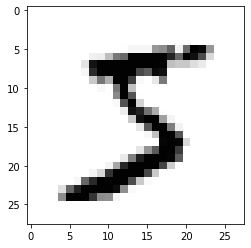

In [6]:
plt.imshow(single_image, cmap='Greys')

The number 5 here is not actually a number but a category, it's a classification problem.
We need to one hot encode the classes 

In [7]:
from tensorflow.keras.utils import to_categorical

In [8]:
y_example = to_categorical(y_train)

In [9]:
y_example[0] # one hard encoded

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [10]:
y_cat_test = to_categorical(y_test, num_classes=10)

In [11]:
y_cat_train = to_categorical(y_train, num_classes=10)

In [12]:
X_train = X_train/255

In [13]:
X_test = X_test/255

In [14]:
X_train.max()

1.0

In [15]:
#batch_size, width, height, color_channels
X_train = X_train.reshape(60000,28,28,1)

In [16]:
X_test = X_test.reshape(10000,28,28,1)

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [18]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (4,4), input_shape = (28,28,1), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

# OUTPUT layer - softmax, multi class classification problem
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [19]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor = 'val_loss', patience = 1)
model.fit(X_train, y_cat_train, epochs=10, validation_data=(X_test,y_cat_test), callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.3046 - accuracy: 0.9074 - val_loss: 0.0695 - val_accuracy: 0.9771
Epoch 2/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0506 - accuracy: 0.9840 - val_loss: 0.0444 - val_accuracy: 0.9843
Epoch 3/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0274 - accuracy: 0.9917 - val_loss: 0.0406 - val_accuracy: 0.9862
Epoch 4/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0214 - accuracy: 0.9932 - val_loss: 0.0404 - val_accuracy: 0.9867
Epoch 5/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0148 - accuracy: 0.9955 - val_loss: 0.0376 - val_accuracy: 0.9884
Epoch 6/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0088 - accuracy: 0.9974 - val_loss: 0.0425 - val_accuracy: 0.9878


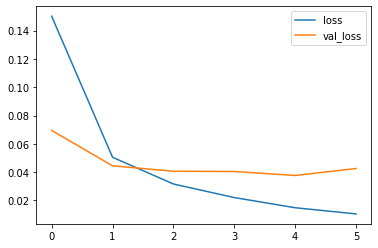

In [20]:
metrics = pd.DataFrame(model.history.history)
#plt.plot(metrics)
metrics[['loss','val_loss']].plot()

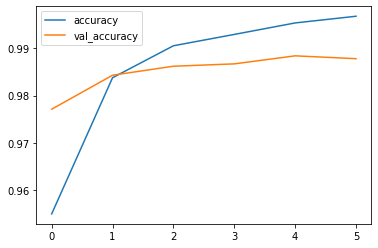

In [21]:
metrics[['accuracy','val_accuracy']].plot()

In [22]:
model.evaluate(X_test, y_cat_test, verbose=0)

[0.04252297803759575, 0.9878000020980835]

In [23]:
from sklearn.metrics import classification_report, confusion_matrix

In [31]:
predictions = model.predict_classes(X_test)
predictions_new_way = model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [29]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       1.00      0.98      0.99      1032
           3       1.00      0.99      0.99      1010
           4       0.97      1.00      0.98       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.98      0.98      0.98       974
           9       0.99      0.96      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [35]:
print(classification_report(y_test, np.argmax(predictions_new_way, axis=1)))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       1.00      0.98      0.99      1032
           3       1.00      0.99      0.99      1010
           4       0.97      1.00      0.98       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.98      0.98      0.98       974
           9       0.99      0.96      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [36]:
predict_number = X_test[0]

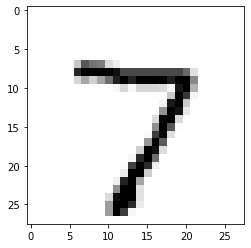

In [38]:
plt.imshow(predict_number.reshape(28,28), cmap='Greys')

In [40]:
# reshape needed, parameters (num_images, width, height, color_channels)
np.argmax(model.predict(predict_number.reshape(1,28,28,1)), axis=-1)

array([7])